In [2]:
import numpy as np
import time

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from lib.phase_parallel import generate_phase_diagram_joblib

import psutil
logical_cores = psutil.cpu_count(logical=True)
physical_cores = psutil.cpu_count(logical=False)
print(f"Number of logical cores: {logical_cores}")
print(f"Number of physical cores: {physical_cores}")

Number of logical cores: 8
Number of physical cores: 8


Starting calculation for 484 points with 8 jobs


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  8.8min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 17.3min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed: 17.5min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 34.7min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 43.8min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 52.7min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 61.8min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 79.4min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 96.9min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed: 113.7min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed: 123.9min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed: 148.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 166.7min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed: 185.0min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 203.2min
[Par


Calculation completed in:
- 32417.71 seconds
- 540.30 minutes
- 9.00 hours
- 0.38 days



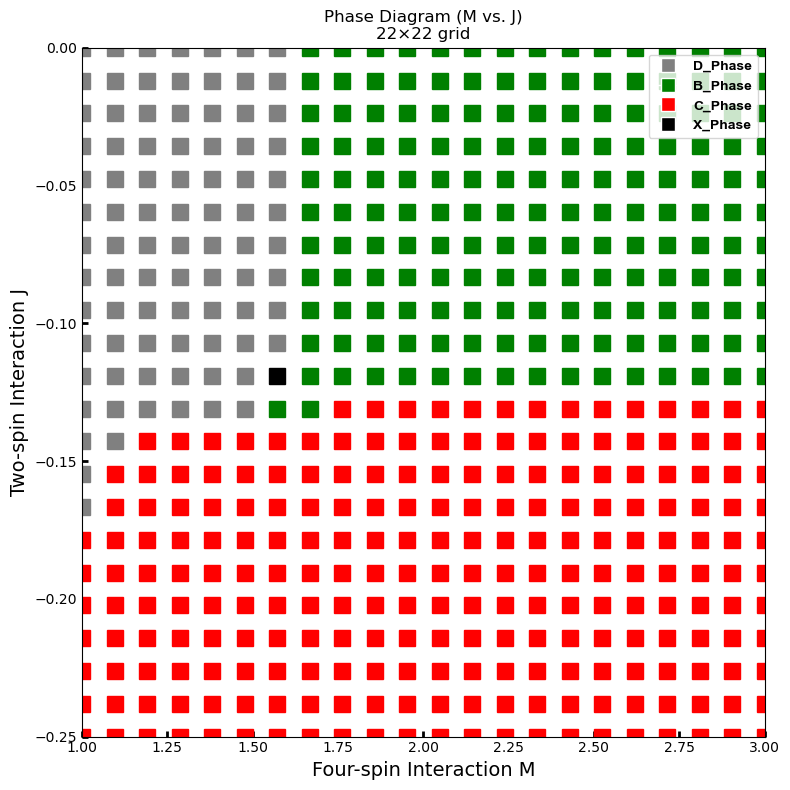

In [4]:
# Define parameter ranges
n_points = 22
J_values = np.linspace(start=-.25, stop=0, num=n_points)
M_values = np.linspace(start=1, stop=3, num=n_points)

start_time = time.time()
# Run the calculation
D_Phase, A_Phase, B_Phase, C_Phase, E_Phase, X_Phase, U_Phase = generate_phase_diagram_joblib(
    J_values,
    M_values,
    n_max_np=20,
    n_max_mp=10,
    n_rg_steps=45,
    b=3,
    d=2,
    history_length=3,
    dps=100,
    path=f"phase_diagram_JM_{n_points}",
    n_jobs=physical_cores,
    only_mp=True)

end_time = time.time()
secs = end_time - start_time
print(f"""
Calculation completed in:
- {secs:.2f} seconds
- {secs / 60:.2f} minutes
- {secs / 60 / 60:.2f} hours
- {secs / 60 / 60 / 24:.2f} days
""")

# Save phase diagram data

In [45]:
from utils import save_phase_diagram

In [47]:
# After generating the phase diagram
filename = f"phase_diagram_JM_{n_points}"
save_phase_diagram(filename,
                   J_values, M_values,
                   D_Phase, A_Phase, B_Phase, C_Phase, E_Phase, X_Phase, U_Phase)

Phase diagram data saved to phase_diagram_JM_512.pkl
